<a href="https://colab.research.google.com/github/Nitikant/turbo-train/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Load the dataset

url = '/content/CC GENERAL.csv'
data = pd.read_csv(url)

In [5]:
# Display the first few rows of the dataset

print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [6]:
# Preprocess the data: handle missing values and standardize features
data = data.dropna()  # Drop rows with missing values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])  # Standardize the features (excluding the first column 'CUST_ID')

In [7]:
# Determine the optimal number of clusters using the Elbow method

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

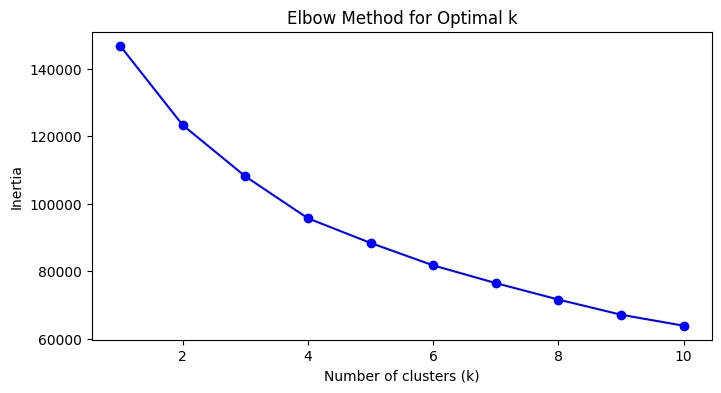

In [8]:
# Plot the Elbow curve

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
# Based on the Elbow curve, let's choose k = 4 (this value might change based on the plot)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
# Add cluster labels to the dataset

data['Cluster'] = kmeans.labels_

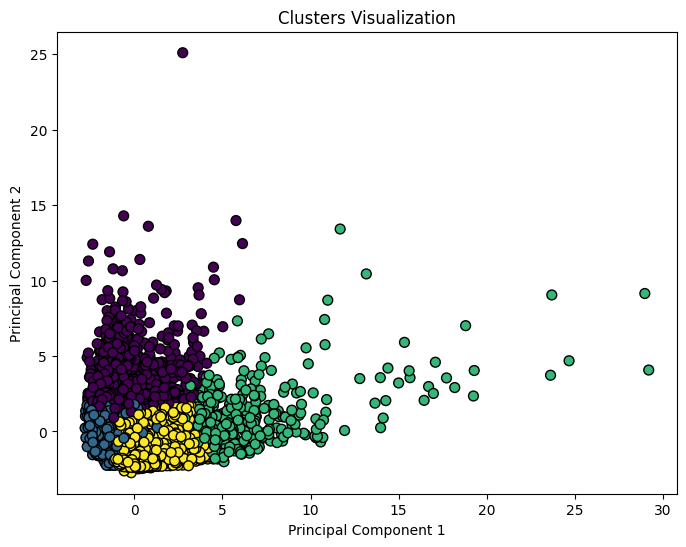

In [11]:
# Visualize the clusters (using first two principal components for simplicity)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.show()

In [12]:
# Calculate silhouette score

silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.19703675772374923


In [13]:
# Display the cluster centers

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print('Cluster Centers:')
print(cluster_centers)

Cluster Centers:
[[4.65466863e+03 9.69185373e-01 5.04585671e+02 3.19242797e+02
  1.85430900e+02 4.58871620e+03 2.90147590e-01 1.39707061e-01
  1.87588448e-01 4.87532165e-01 1.44571429e+01 7.75238095e+00
  7.64809917e+03 3.55671063e+03 2.03864714e+03 3.53567645e-02
  1.13852814e+01]
 [1.06124506e+03 8.18900661e-01 2.73943703e+02 2.10942878e+02
  6.32798476e+01 6.06661232e+02 1.74488106e-01 8.77241869e-02
  8.31224949e-02 1.19161883e-01 2.21103811e+00 2.99789750e+00
  3.25915988e+03 1.01357518e+03 5.73842255e+02 8.40560465e-02
  1.14791064e+01]
 [3.58614781e+03 9.86840495e-01 7.81607074e+03 5.19455952e+03
  2.62303406e+03 6.58230083e+02 9.44589310e-01 7.37344272e-01
  7.86971256e-01 7.08313832e-02 2.09898477e+00 9.03477157e+01
  9.77538071e+03 7.45404168e+03 2.01614098e+03 2.91841528e-01
  1.19492386e+01]
 [9.14398598e+02 9.46185845e-01 1.26476625e+03 6.11185037e+02
  6.53862529e+02 2.18782441e+02 8.87337021e-01 3.02425977e-01
  7.13625862e-01 4.38548842e-02 8.16879951e-01 2.25073126e+01

In [14]:
# Analyze cluster attributes

for i in range(optimal_k):
    print(f'\nCluster {i} Statistics:')
    print(data[data['Cluster'] == i].describe())


Cluster 0 Statistics:
            BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   1155.000000        1155.000000  1155.000000       1155.000000   
mean    4654.668634           0.969185   504.585671        319.242797   
std     2768.467027           0.089417   865.727150        663.983473   
min       78.114579           0.181818     0.000000          0.000000   
25%     2526.512820           1.000000     0.000000          0.000000   
50%     4345.879999           1.000000    91.840000          0.000000   
75%     6306.663776           1.000000   660.355000        329.875000   
max    16304.889250           1.000000  7194.530000       6678.260000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              1155.00000   1155.000000          1155.000000   
mean                185.43090   4588.716197             0.290148   
std                 422.08237   3656.186860             0.355639   
min                   0.00000      0.000000    